<a href="https://colab.research.google.com/github/pverofeev/hworld/blob/main/PYDA_44_BaseStat_Erofeev_PV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [201]:
# Задание 1. Загрузка данных
# Изучить представленный набор данных на основе описания его столбцов, загрузить его и оставить 8 столбцов для дальнейшего изучения:
# surgery?, Age, rectal temperature, pulse, respiratory rate, temperature of extremities, pain, outcome.


import pandas as pd
import numpy as np

df = pd.read_csv('https://raw.githubusercontent.com/obulygin/pyda_homeworks/master/statistics_basics/horse_data.csv',usecols=[0,1,3,4,5,6,10,22], na_values='?')
df.columns  = ['surgery?', 'Age', 'rectal temperature', 'pulse', 'respiratory rate', 'temperature of extremities', 'pain', 'outcome']
# какие типы признаков в нашем датафрейме?
df.head()

,surgery?,Age,rectal temperature,pulse,respiratory rate,temperature of extremities,pain,outcome
0,1.0,1,39.2,88.0,20.0,NaN,3.0,3.0
1,2.0,1,38.3,40.0,24.0,1.0,3.0,1.0
2,1.0,9,39.1,164.0,84.0,4.0,2.0,2.0
3,2.0,1,37.3,104.0,35.0,NaN,NaN,2.0
4,2.0,1,NaN,NaN,NaN,2.0,2.0,1.0


In [202]:
## Задание 2. Первичное изучение данных
# Проанализировать значения по столбцам, рассчитать базовые статистики, найти выбросы.
df.describe(include = "all").T

,count,mean,std,min,25%,50%,75%,max
surgery?,298.0,1.395973,0.489881,1.0,1.0,1.0,2.0,2.0
Age,299.0,1.642140,2.177300,1.0,1.0,1.0,1.0,9.0
rectal temperature,239.0,38.166527,0.733508,35.4,37.8,38.2,38.5,40.8
pulse,275.0,71.934545,28.680522,30.0,48.0,64.0,88.0,184.0
respiratory rate,241.0,30.427386,17.678256,8.0,18.0,24.0,36.0,96.0
temperature of extremities,243.0,2.345679,1.046369,1.0,1.0,3.0,3.0,4.0
pain,244.0,2.942623,1.303993,1.0,2.0,3.0,4.0,5.0
outcome,298.0,1.550336,0.737967,1.0,1.0,1.0,2.0,3.0


In [203]:
# Метод info() позволяет вывести общую информацию о датасете
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   surgery?                    298 non-null    float64
 1   Age                         299 non-null    int64  
 2   rectal temperature          239 non-null    float64
 3   pulse                       275 non-null    float64
 4   respiratory rate            241 non-null    float64
 5   temperature of extremities  243 non-null    float64
 6   pain                        244 non-null    float64
 7   outcome                     298 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 18.8 KB


In [204]:
# Рассчитываем базовые статистики
for col in df.columns:
  print('===================================')
  print(col,':::')
  print('     Max:',df[col].max())
  print('     Min:',df[col].min())
  # размах – разница между минимальным и максимальным значением
  range = df[col].max() - df[col].min()
  print('     Размах:',range)
  #Среднеарифметическое
  print('     Среднеарифметическое:',df[col].mean())
  print('     Значение моды: ', df[col].mode()[0])
  print('     Медиана:',df[col].median())
  print('     СКО:',df[col].std())
  print('     Дисперсия:',df[col].var())
  print('     Квантиль(медиана):',df[col].quantile())
  print('     Квантиль(0.25):',df[col].quantile(0.25))
  print('     Квантиль(0.75):',df[col].quantile(0.75))
  print('     Межквартильный размах:',df[col].quantile(0.75)-df[col].quantile(0.25))


surgery? :::
     Max: 2.0
     Min: 1.0
     Размах: 1.0
     Среднеарифметическое: 1.395973154362416
     Значение моды:  1.0
     Медиана: 1.0
     СКО: 0.4898813426908764
     Дисперсия: 0.23998372991661587
     Квантиль(медиана): 1.0
     Квантиль(0.25): 1.0
     Квантиль(0.75): 2.0
     Межквартильный размах: 1.0
Age :::
     Max: 9
     Min: 1
     Размах: 8
     Среднеарифметическое: 1.6421404682274248
     Значение моды:  1
     Медиана: 1.0
     СКО: 2.1772997793587714
     Дисперсия: 4.740634329195755
     Квантиль(медиана): 1.0
     Квантиль(0.25): 1.0
     Квантиль(0.75): 1.0
     Межквартильный размах: 0.0
rectal temperature :::
     Max: 40.8
     Min: 35.4
     Размах: 5.399999999999999
     Среднеарифметическое: 38.166527196652716
     Значение моды:  38.0
     Медиана: 38.2
     СКО: 0.7335083691537396
     Дисперсия: 0.5380345276185787
     Квантиль(медиана): 38.2
     Квантиль(0.25): 37.8
     Квантиль(0.75): 38.5
     Межквартильный размах: 0.7000000000000028
pulse

In [205]:
# Смотрим уникальные значения и подсчет количество по значению
for col in df.columns:
  print('===================================')
  print(col,':::')
  print('unique',df[col].unique())
  print('value_counts',df[col].value_counts())

surgery? :::
unique [ 1.  2. nan]
value_counts 1.0    180
2.0    118
Name: surgery?, dtype: int64
Age :::
unique [1 9]
value_counts 1    275
9     24
Name: Age, dtype: int64
rectal temperature :::
unique [39.2 38.3 39.1 37.3  nan 37.9 38.1 37.2 38.  38.2 37.6 37.5 39.4 39.9
 38.4 38.6 37.8 37.7 39.  35.4 38.9 37.4 40.3 38.5 37.  39.7 38.7 36.4
 38.8 39.6 36.8 39.5 36.5 36.  37.1 39.3 36.1 36.6 40.8 36.9 40. ]
value_counts 38.0    26
38.3    18
38.5    18
37.8    17
38.2    16
38.1    12
37.5    12
38.6    12
38.4    11
38.7     7
37.7     7
37.9     7
37.2     7
37.6     7
37.3     6
38.8     6
39.2     5
39.0     4
39.5     4
38.9     4
39.3     4
37.1     3
37.4     3
39.4     3
37.0     2
39.1     2
36.5     2
40.3     2
35.4     1
39.6     1
36.8     1
39.9     1
39.7     1
36.0     1
36.4     1
36.1     1
36.6     1
40.8     1
36.9     1
40.0     1
Name: rectal temperature, dtype: int64
pulse :::
unique [ 88.  40. 164. 104.  nan  48.  60.  80.  90.  66.  72.  42.  92.  76.
  96. 1

In [206]:
#Считаем выбросы
for col in df.columns:
  print('===================================')
  print(col,':::')
  h = pd.Series(df[col])
  Q1 = h.quantile(0.25)
  Q3 = h.quantile(0.75)
  iqr = Q3 - Q1
  lower_bound = Q1 - 1.5 * iqr
  upper_bound = Q3 + 1.5 * iqr
  outliers = [x for x in h if x < lower_bound or x > upper_bound]
  print(outliers)

surgery? :::
[]
Age :::
[9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9]
rectal temperature :::
[39.9, 35.4, 40.3, 39.7, 36.4, 40.3, 39.6, 36.5, 36.0, 36.1, 36.6, 40.8, 40.0, 36.5]
pulse :::
[164.0, 150.0, 160.0, 184.0, 150.0]
respiratory rate :::
[84.0, 96.0, 72.0, 80.0, 80.0, 68.0, 96.0, 66.0, 68.0, 90.0, 80.0, 70.0, 88.0, 84.0, 68.0, 90.0, 70.0]
temperature of extremities :::
[]
pain :::
[]
outcome :::
[]


In [207]:
# Задание 3. Работа с пропусками
# Рассчитать количество пропусков для всех выбранных столбцов.
# Принять и обосновать решение о методе заполнения пропусков по каждому столбцу на основе рассчитанных статистик и возможной взаимосвязи значений в них.
# Сформировать датафрейм, в котором пропуски будут отсутствовать.
df = pd.read_csv('https://raw.githubusercontent.com/obulygin/pyda_homeworks/master/statistics_basics/horse_data.csv',usecols=[0,1,3,4,5,6,10,22], na_values='?')
df.columns  = ['surgery?', 'Age', 'rectal temperature', 'pulse', 'respiratory rate', 'temperature of extremities', 'pain', 'outcome']

In [208]:
# Согласно описанию Age может принимать значение 1 и 2. Но в df есть только 1 и 9. Делаю допущение, что при заполнении ошиблись и 9 нужно поменять на 2
#  2:  Age
#          1 = Adult horse
#          2 = Young (< 6 months)

df['Age'].replace({9:2}, inplace = True)

In [209]:
# Рассчитать количество пропусков для всех выбранных столбцов.
# (df.isna().mean() * 100).round(2)
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100,2)))

surgery? - 0.33%
Age - 0.0%
rectal temperature - 20.07%
pulse - 8.03%
respiratory rate - 19.4%
temperature of extremities - 18.73%
pain - 18.39%
outcome - 0.33%


In [210]:
# Делаю допущение, что есть взаимосвязь pain и pulse
print(df.groupby('pain')['pulse'].median())

pain
1.0    48.0
2.0    78.0
3.0    60.0
4.0    80.0
5.0    89.0
Name: pulse, dtype: float64


In [211]:
# Выполняем заполнение пропусков с группировкой по одной переменной
df['pulse'] = df['pulse'].fillna(df.groupby('pain')['pulse'].transform('median'))

In [212]:
# Количественные (числовые) данные меняем на среднее
df['rectal temperature'].fillna(df['rectal temperature'].mean(), inplace = True)
df['pulse'].fillna(df['pulse'].mean(), inplace = True)
df['respiratory rate'].fillna(df['respiratory rate'].mean(), inplace = True)
df['temperature of extremities'].fillna(df['temperature of extremities'].mean(), inplace = True)

In [213]:
#  Категориальные данные меняем на моду
df['surgery?'].fillna(df['surgery?'].mode()[0], inplace = True)
df['pain'].fillna(df['pain'].mode()[0], inplace = True)
df['outcome'].fillna(df['outcome'].mode()[0], inplace = True)

lived             179
died               76
was euthanized     44
Name: outcome, dtype: int64


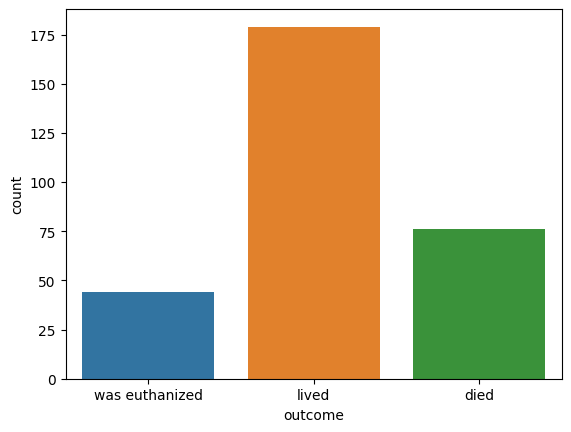

In [214]:
# Для визуализации с помощью seaborn делаем гистограму категориальной переменной outcome предварительно поменяв значения согласно описанию.
import seaborn as sns

df['outcome'].replace({1:'lived', 2:'died', 3:'was euthanized'}, inplace = True)

sns.countplot(data=df, x="outcome");
print(df.outcome.value_counts())